<h1><b>Import Data Science Libraries

In [1]:
import numpy as np # Provides functions for numerical computations (arrays, matrices, etc.).
import pandas as pd # Used for data manipulation and analysis (dataframes, series).
import matplotlib.pyplot as plt # Used for creating visualizations (plots, charts).
import tensorflow as tf # The core TensorFlow library for building and training machine learning models.
from sklearn.model_selection import train_test_split # Splits data into training and testing sets.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix # Used for evaluating the performance of a classification model.
import matplotlib.image as mpimg # Used for reading images.
import seaborn as sns
from PIL import Image # Python Imaging Library for image processing tasks.

# Tensorflow Libraries
from tensorflow.keras.models import Model # Used to define the neural network architecture.
from tensorflow.keras.models import Sequential # Used to create a sequential model.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Layers for building the neural network.
from tensorflow.keras.optimizers import Adam # An optimizer used to train the model.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # Callbacks for monitoring and managing training.

# System libraries ==> Used for file path manipulation and system interactions.
from pathlib import Path
import os

# Metrics
from sklearn.metrics import classification_report, confusion_matrix # Used to evaluate the model's performance.
import itertools # Provides functions for working with iterables (used in confusion matrix visualization).

<h1><b>Loading Dataset From Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/RT_IOT2022.csv")

<h1><b>Exploratory Data Analysis

In [4]:
# Drop First Column (Useless Column)
dataset.drop(columns=['Unnamed: 0'],inplace = True,axis=1)

In [5]:
dataset.head(10)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667.0,1883.0,tcp,mqtt,32.011598,9.0,5.0,3.0,3.0,0.281148,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
1,51143.0,1883.0,tcp,mqtt,31.883584,9.0,5.0,3.0,3.0,0.282277,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
2,44761.0,1883.0,tcp,mqtt,32.124053,9.0,5.0,3.0,3.0,0.280164,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
3,60893.0,1883.0,tcp,mqtt,31.961063,9.0,5.0,3.0,3.0,0.281593,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
4,51087.0,1883.0,tcp,mqtt,31.902362,9.0,5.0,3.0,3.0,0.282111,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
5,48579.0,1883.0,tcp,mqtt,31.869686,9.0,5.0,3.0,3.0,0.282400,...,0.0,2.982555e+07,2.982555e+07,2.982555e+07,2.982555e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
6,54063.0,1883.0,tcp,mqtt,32.094711,9.0,5.0,3.0,3.0,0.280420,...,0.0,2.982342e+07,2.982342e+07,2.982342e+07,2.982342e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
7,33457.0,1883.0,tcp,mqtt,32.104011,9.0,5.0,3.0,3.0,0.280339,...,0.0,2.979543e+07,2.979543e+07,2.979543e+07,2.979543e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
8,52181.0,1883.0,tcp,mqtt,32.026967,9.0,5.0,3.0,3.0,0.281013,...,0.0,2.966162e+07,2.966162e+07,2.966162e+07,2.966162e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
9,53469.0,1883.0,tcp,mqtt,32.048637,9.0,5.0,3.0,3.0,0.280823,...,0.0,2.977845e+07,2.977845e+07,2.977845e+07,2.977845e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,123117.0,3.463926e+04,1.907062e+04,0.0,17702.000000,37221.000000,50971.000000,6.553500e+04
id.resp_p,123117.0,1.014305e+03,5.256372e+03,0.0,21.000000,21.000000,21.000000,6.538900e+04
flow_duration,123117.0,3.809566e+00,1.300054e+02,0.0,0.000001,0.000004,0.000005,2.172834e+04
fwd_pkts_tot,123117.0,2.268826e+00,2.233656e+01,0.0,1.000000,1.000000,1.000000,4.345000e+03
bwd_pkts_tot,123117.0,1.909509e+00,3.301831e+01,0.0,1.000000,1.000000,1.000000,1.011200e+04
...,...,...,...,...,...,...,...,...
idle.avg,123117.0,1.664985e+06,9.007064e+06,0.0,0.000000,0.000000,0.000000,3.000000e+08
idle.std,123117.0,4.550183e+04,1.091361e+06,0.0,0.000000,0.000000,0.000000,1.208029e+08
fwd_init_window_size,123117.0,6.118905e+03,1.871631e+04,0.0,64.000000,64.000000,64.000000,6.553500e+04
bwd_init_window_size,123117.0,2.739776e+03,1.001885e+04,0.0,0.000000,0.000000,0.000000,6.553500e+04


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123118 entries, 0 to 123117
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  float64
 1   id.resp_p                 123117 non-null  float64
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  float64
 6   bwd_pkts_tot              123117 non-null  float64
 7   fwd_data_pkts_tot         123117 non-null  float64
 8   bwd_data_pkts_tot         123117 non-null  float64
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  f

<h3><b>Attack Types Distribution

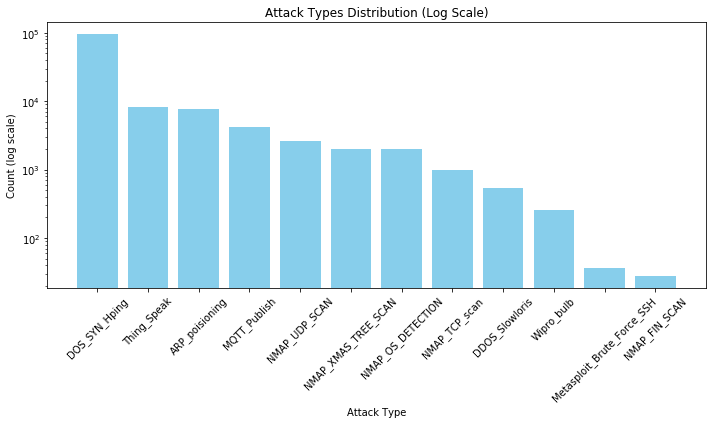

In [ ]:
attack_type_counts = dataset['Attack_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(attack_type_counts)), attack_type_counts.values, color='skyblue')
plt.title('Attack Types Distribution (Log Scale)')
plt.xlabel('Attack Type')
plt.ylabel('Count (log scale)')
plt.xticks(np.arange(len(attack_type_counts)), attack_type_counts.index, rotation=45)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.tight_layout()
plt.show()

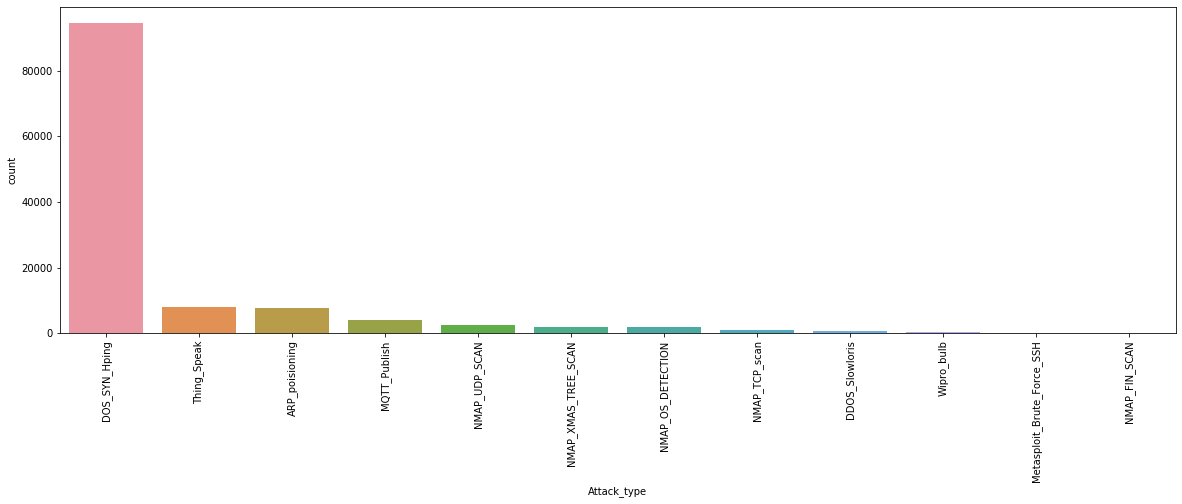

In [ ]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=dataset,x=dataset['Attack_type'],order=dataset['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<h3><b>Protocols Distribution

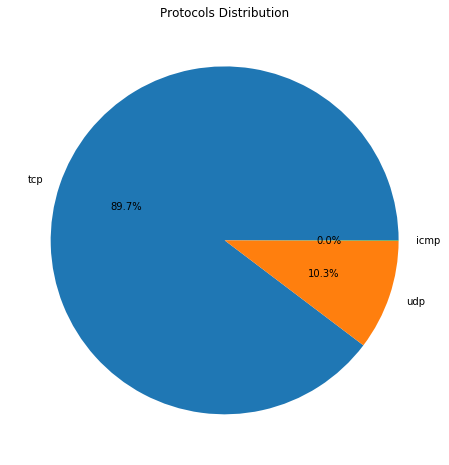

In [ ]:
protocol_counts = dataset['proto'].value_counts()
plt.figure(figsize=(8, 8))
protocol_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Protocols Distribution')
plt.ylabel('')
plt.show()

<h3><b>Services Distribution

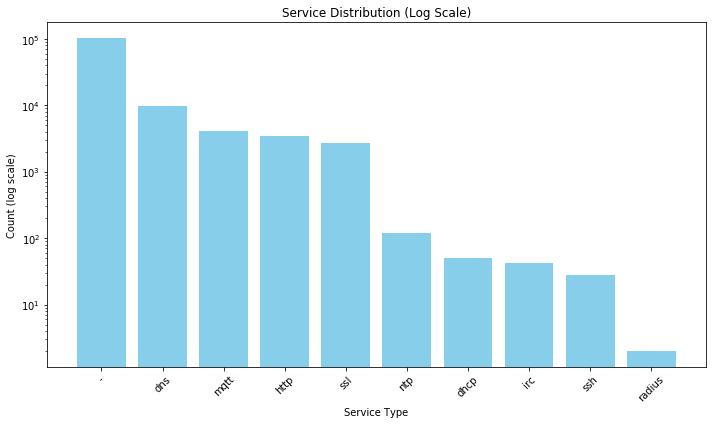

In [ ]:
service_counts = dataset['service'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(service_counts)), service_counts.values, color='skyblue')
plt.title('Service Distribution (Log Scale)')
plt.xlabel('Service Type')
plt.ylabel('Count (log scale)')
plt.xticks(np.arange(len(service_counts)), service_counts.index, rotation=45)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.tight_layout()
plt.show()

<h3><b>Group by Attack Type and Flow Duration

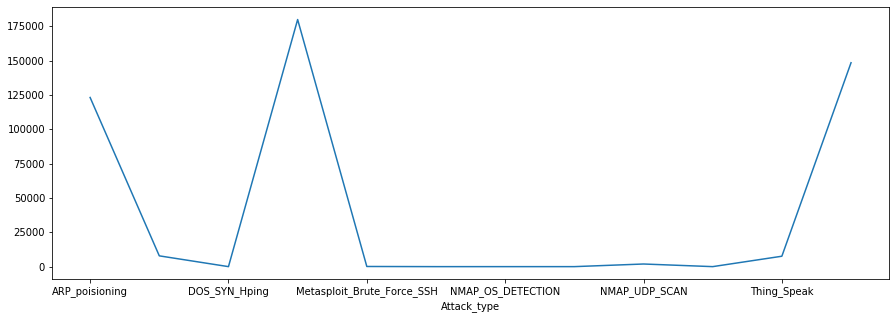

In [ ]:
attack_type_flow= dataset.groupby('Attack_type',)['flow_duration'].sum()
attack_type_flow.plot(figsize=(15,5))

<h3><b>Some GroupBy Reports

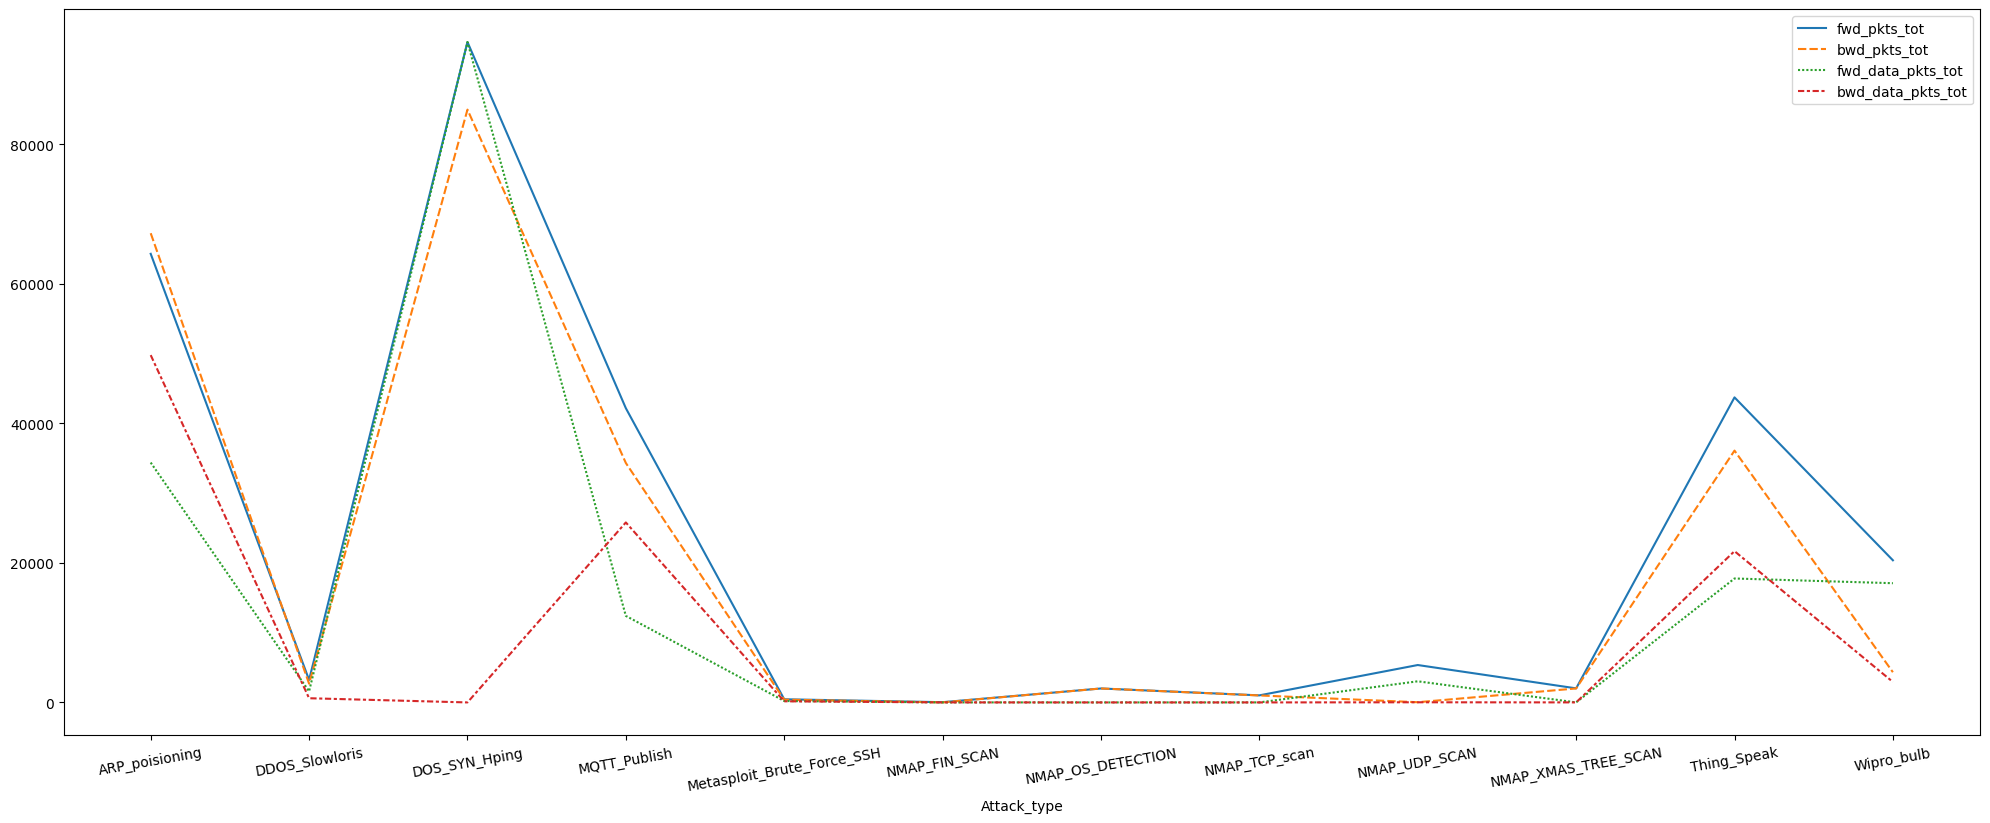

In [ ]:
attack_type_fwd_bwd_points= dataset.groupby('Attack_type')[['fwd_pkts_tot','bwd_pkts_tot','fwd_data_pkts_tot','bwd_data_pkts_tot']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_bwd_points)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

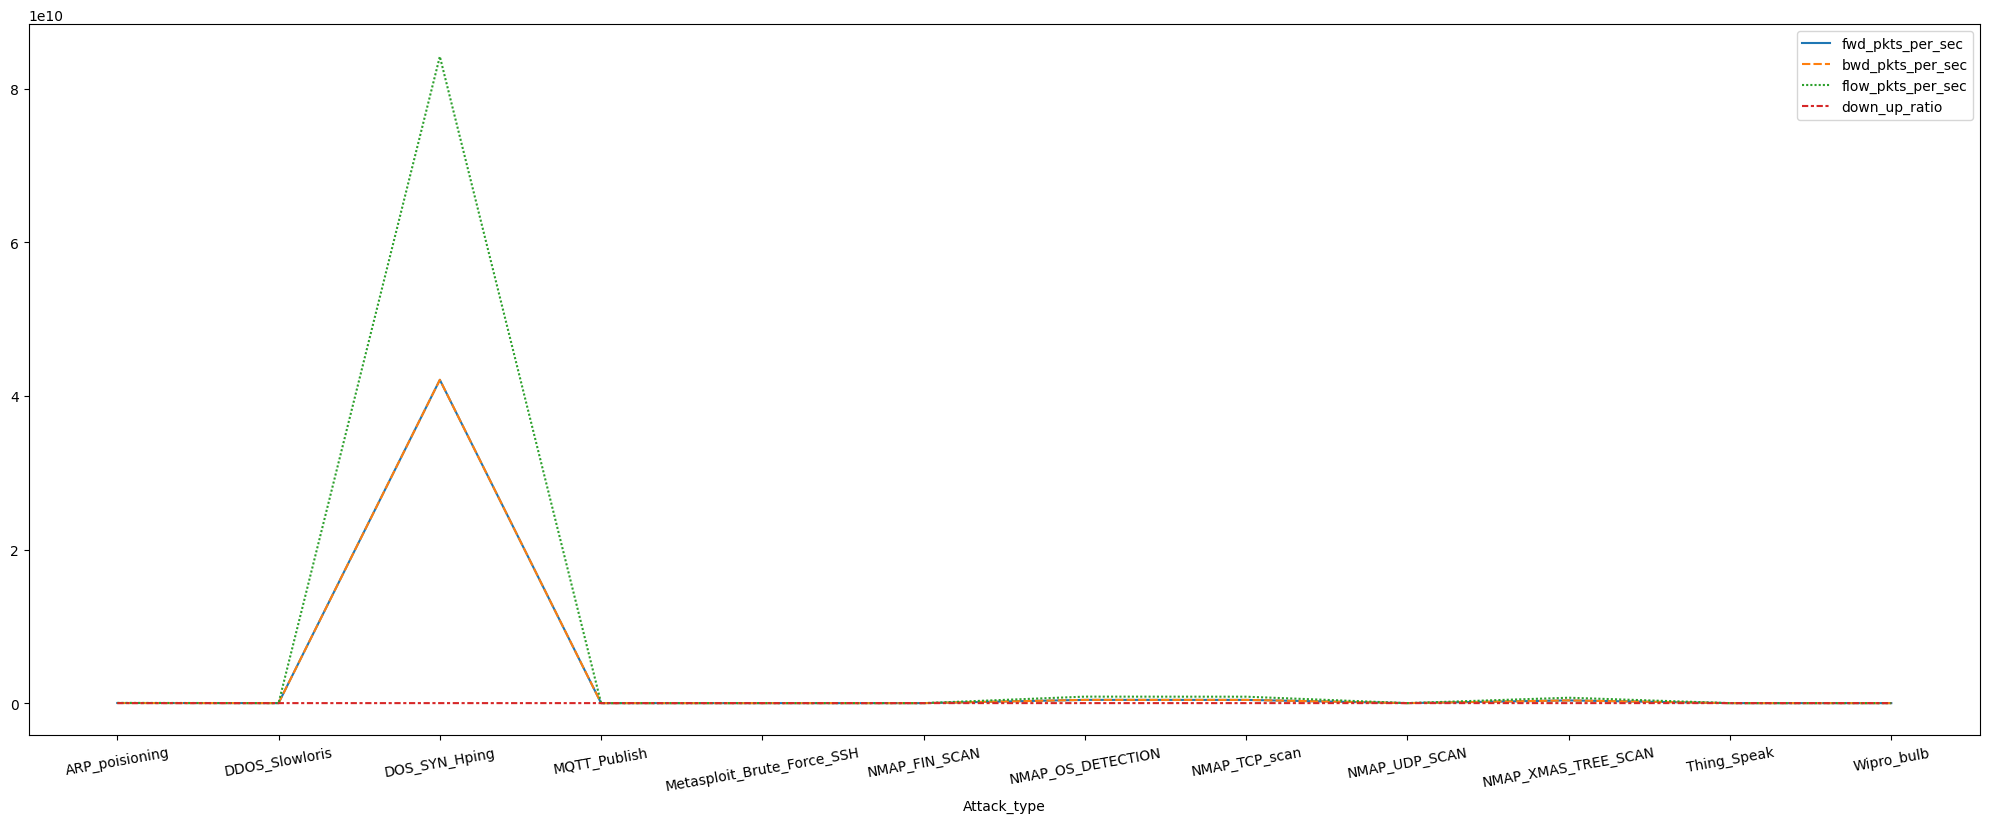

In [ ]:
attack_type_flow_fwd_bwd_pkts_per_sec = dataset.groupby('Attack_type')[['fwd_pkts_per_sec','bwd_pkts_per_sec','flow_pkts_per_sec','down_up_ratio']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_flow_fwd_bwd_pkts_per_sec)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

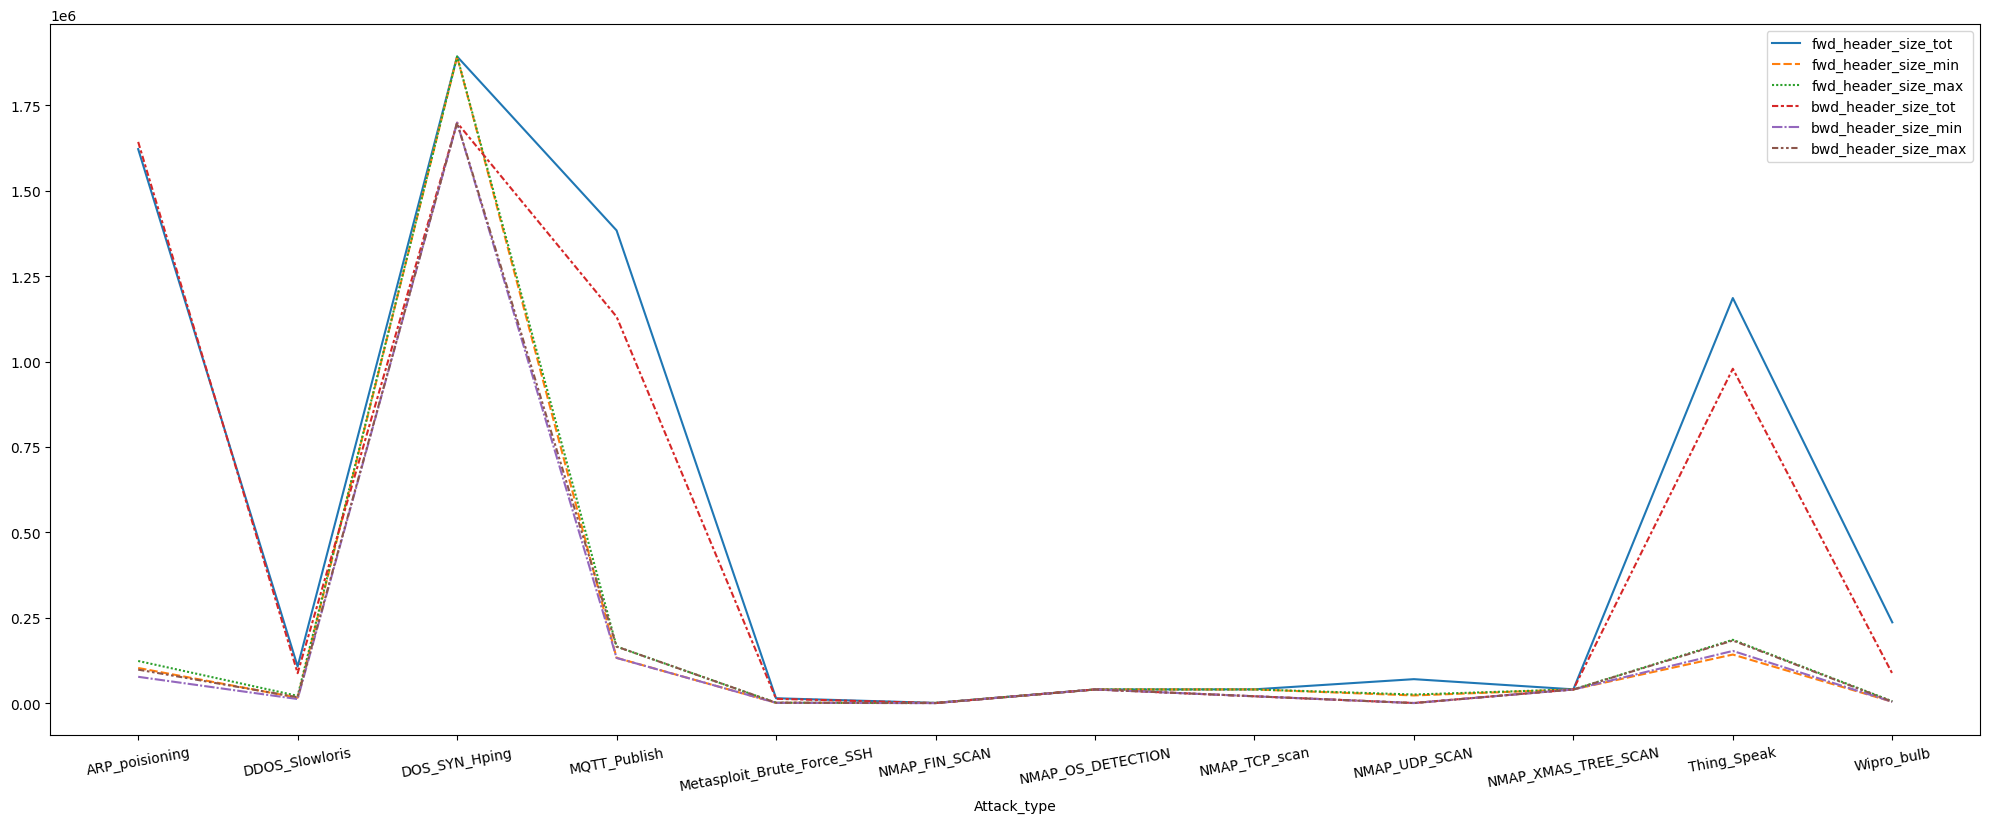

In [ ]:
attack_type_flow_fwd_bwd_header_size = dataset.groupby('Attack_type')[['fwd_header_size_tot','fwd_header_size_min','fwd_header_size_max','bwd_header_size_tot','bwd_header_size_min','bwd_header_size_max']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_flow_fwd_bwd_header_size)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

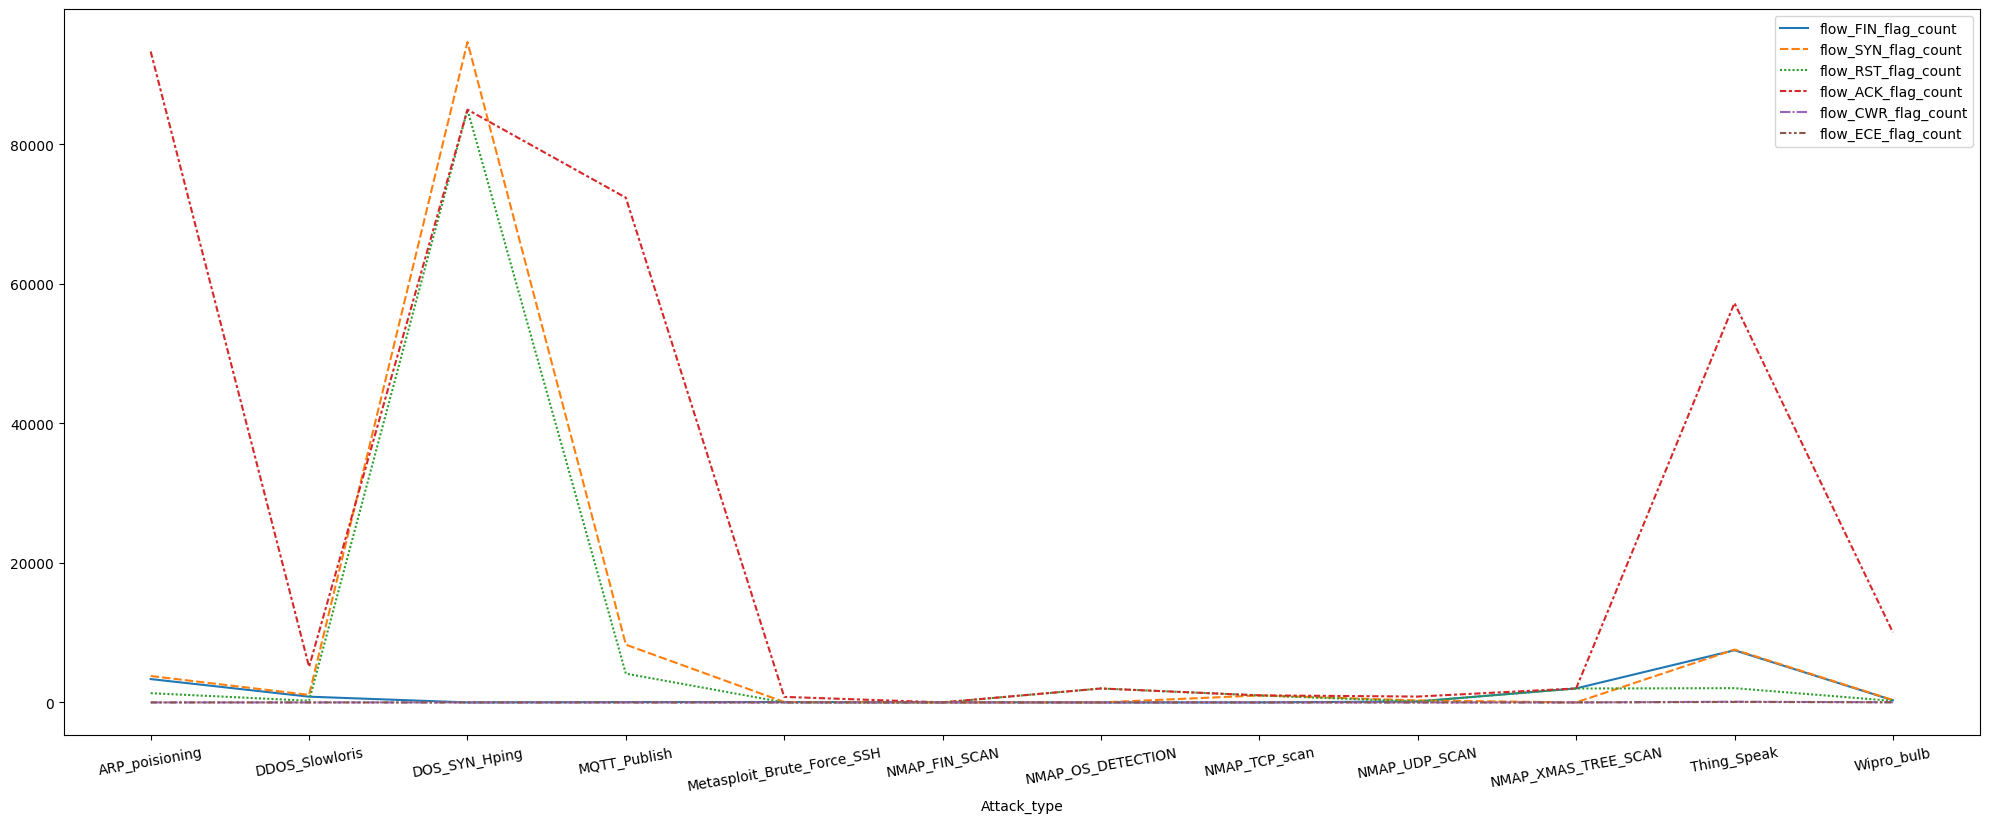

In [ ]:
attack_type_flow_flag = dataset.groupby('Attack_type')[['flow_FIN_flag_count','flow_SYN_flag_count','flow_RST_flag_count','flow_ACK_flag_count','flow_CWR_flag_count','flow_ECE_flag_count']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_flow_flag)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

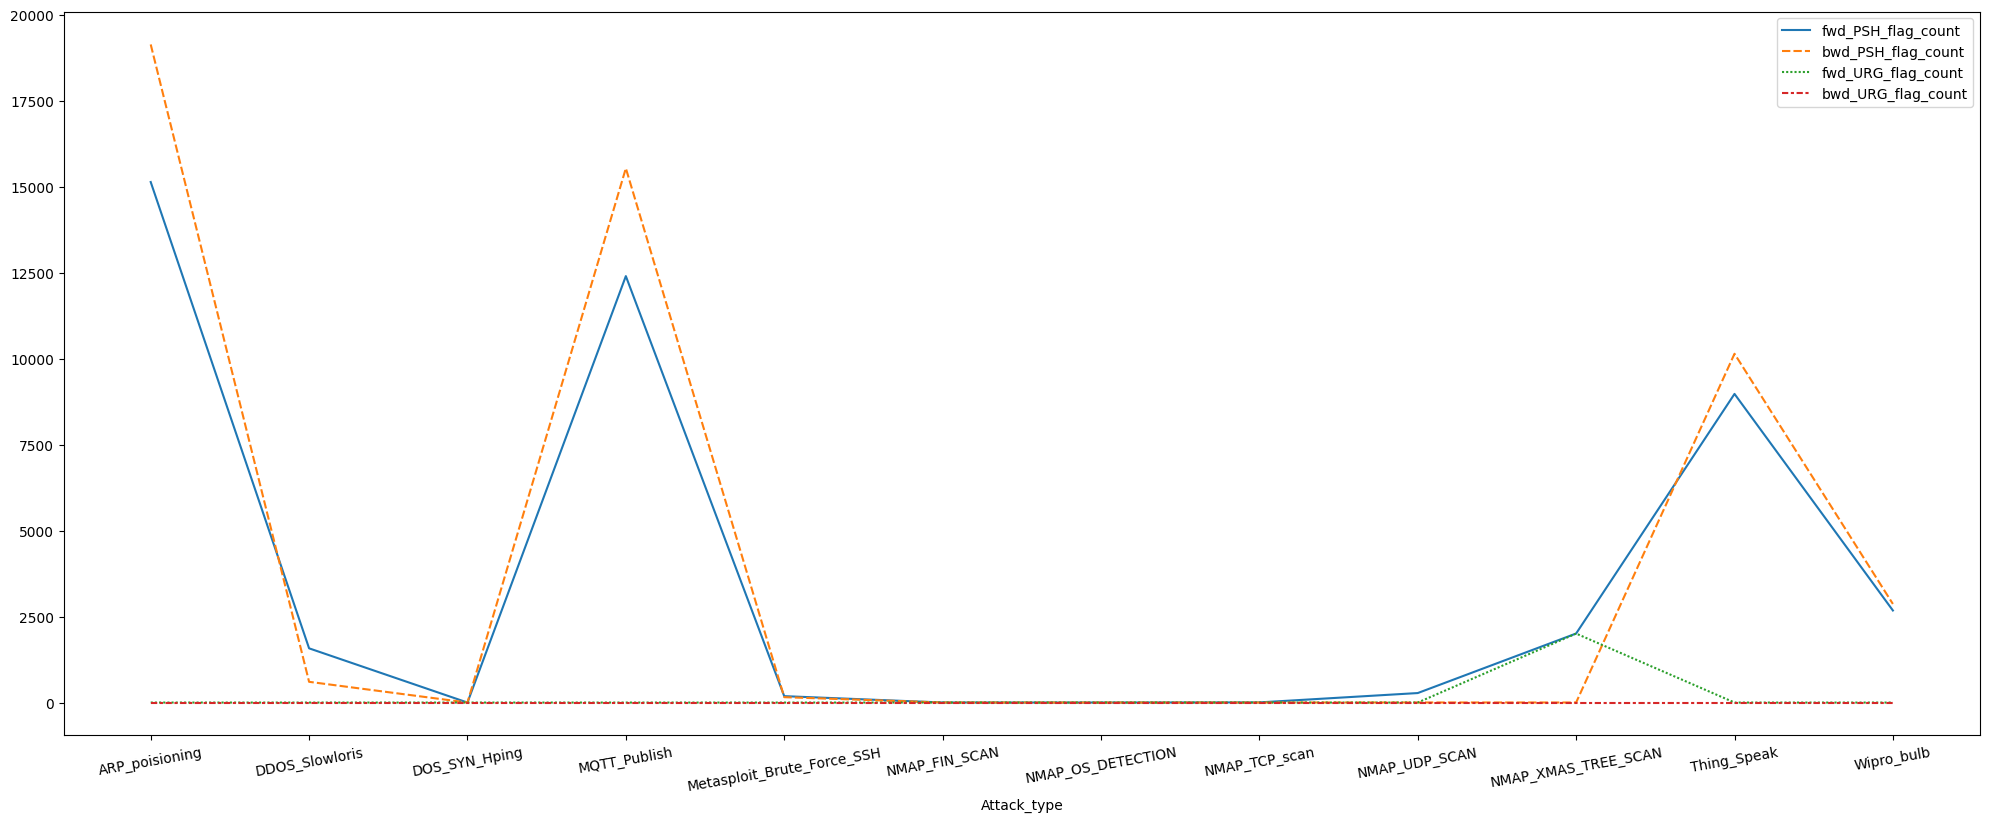

In [ ]:
attack_type_fwd_flow_flag = dataset.groupby('Attack_type')[['fwd_PSH_flag_count','bwd_PSH_flag_count','fwd_URG_flag_count','bwd_URG_flag_count']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_flow_flag)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

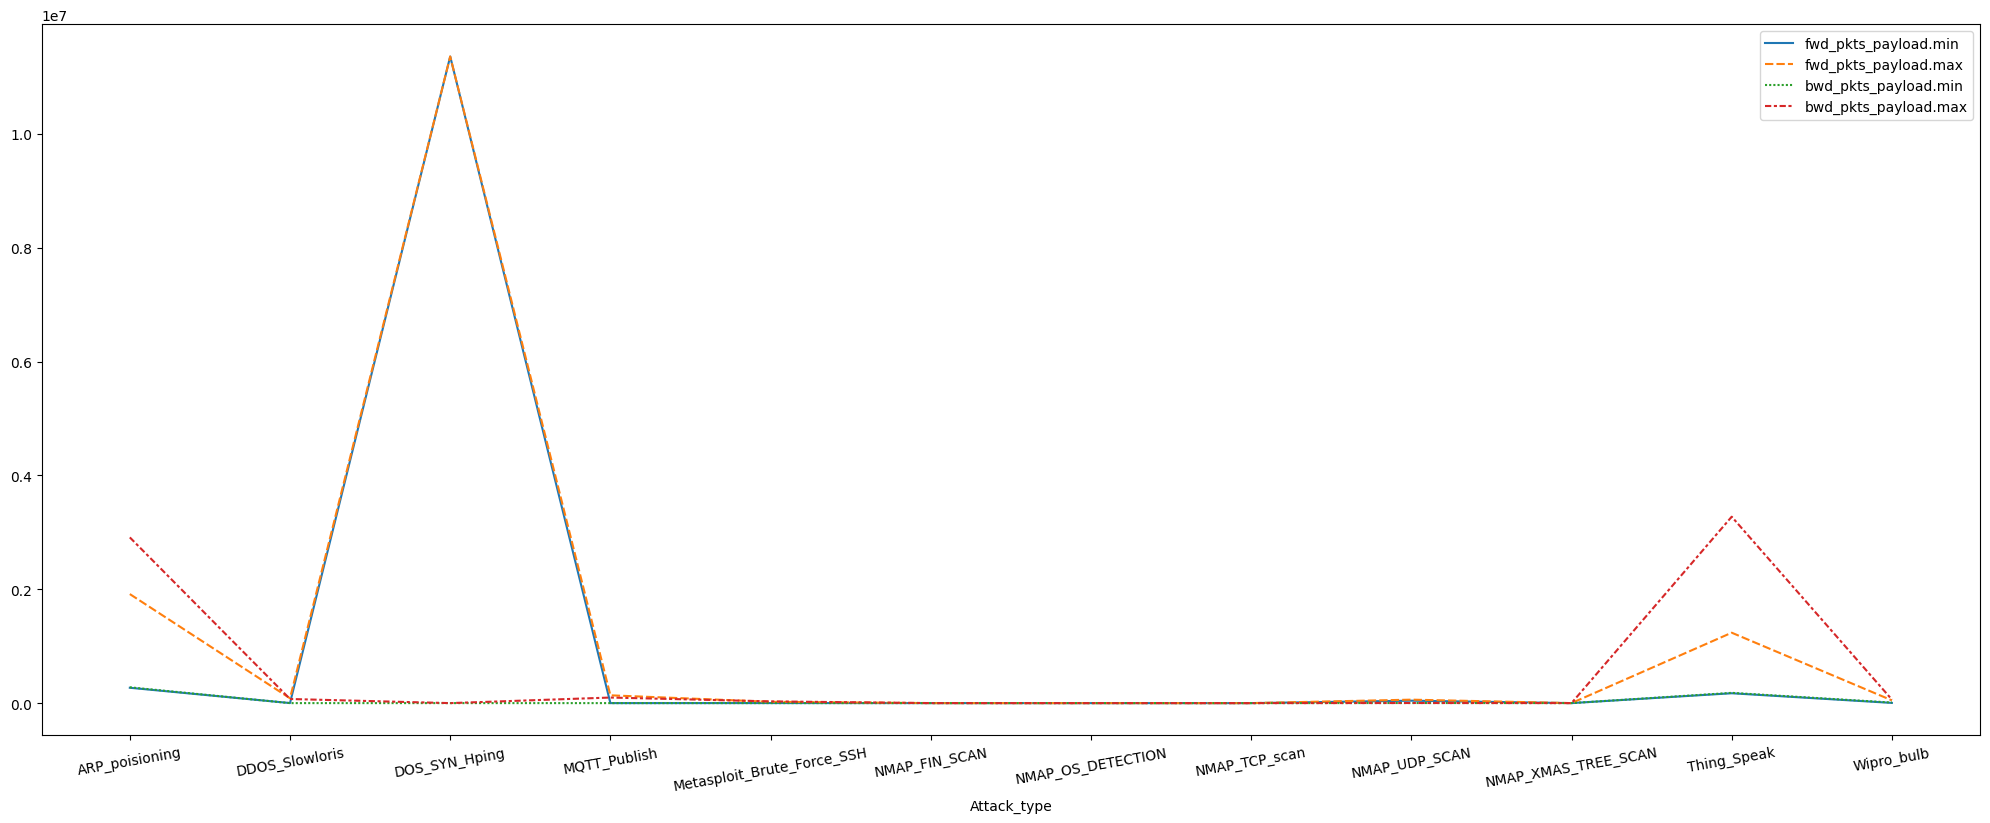

In [ ]:
attack_type_fwd_playload = dataset.groupby('Attack_type')[['fwd_pkts_payload.min','fwd_pkts_payload.max','bwd_pkts_payload.min','bwd_pkts_payload.max']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_playload)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

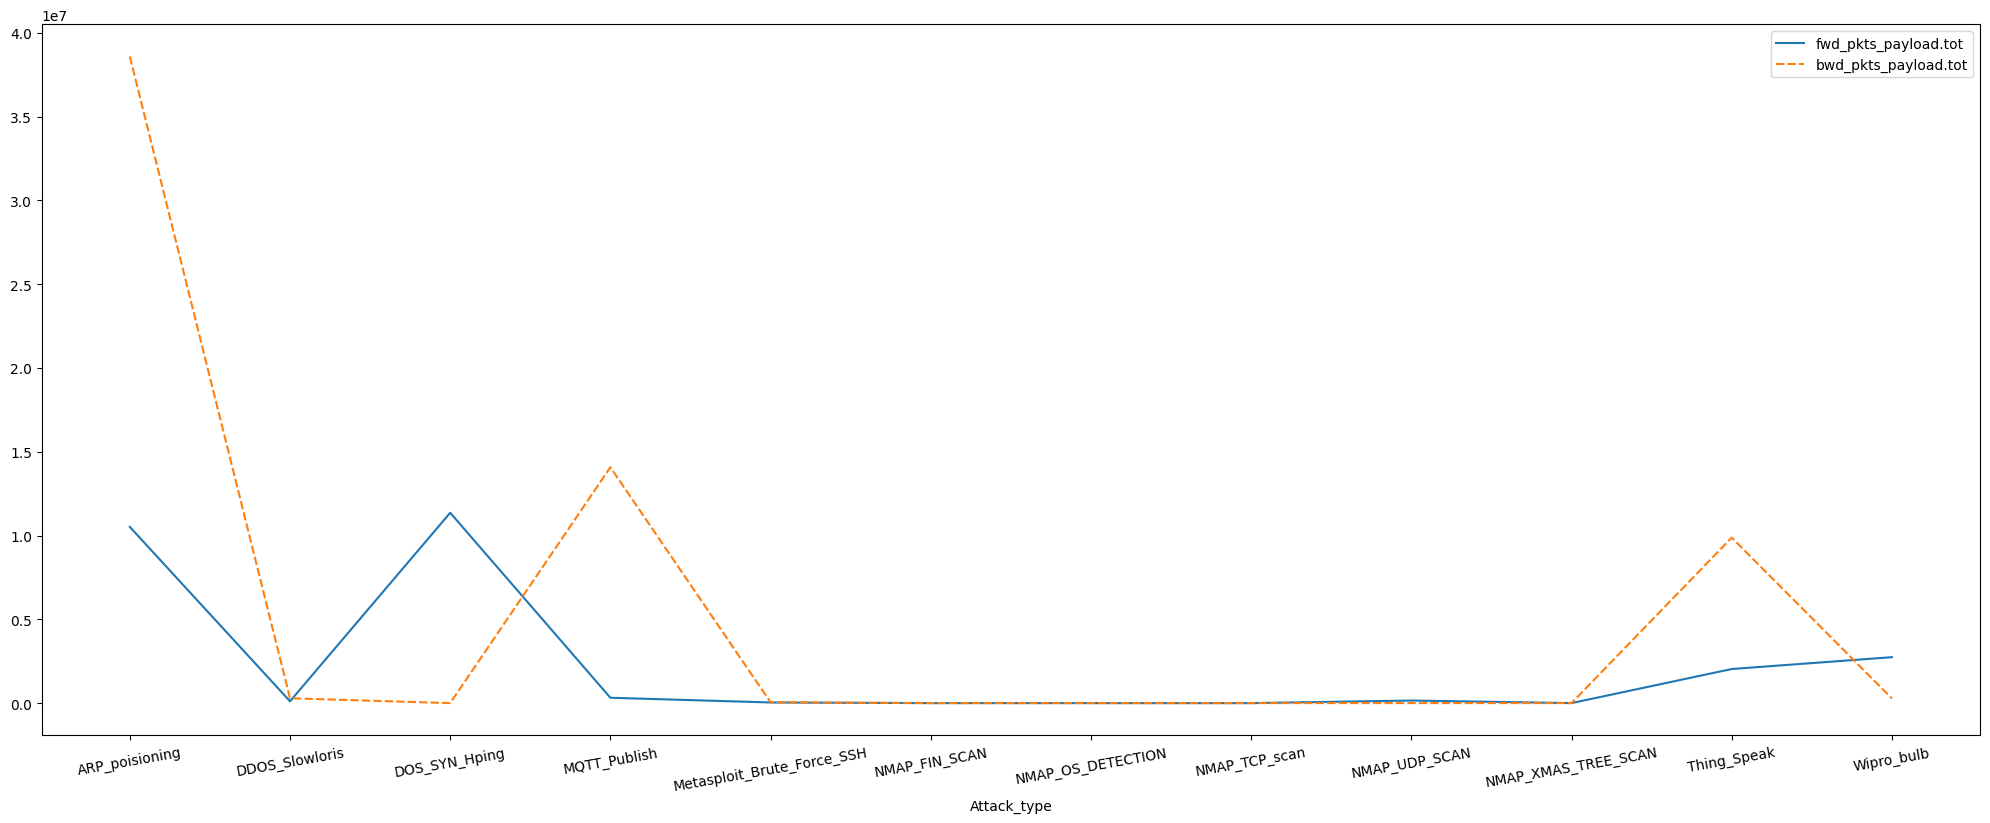

In [ ]:
attack_type_fwd_playload_total = dataset.groupby('Attack_type')[['fwd_pkts_payload.tot','bwd_pkts_payload.tot']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_playload_total)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

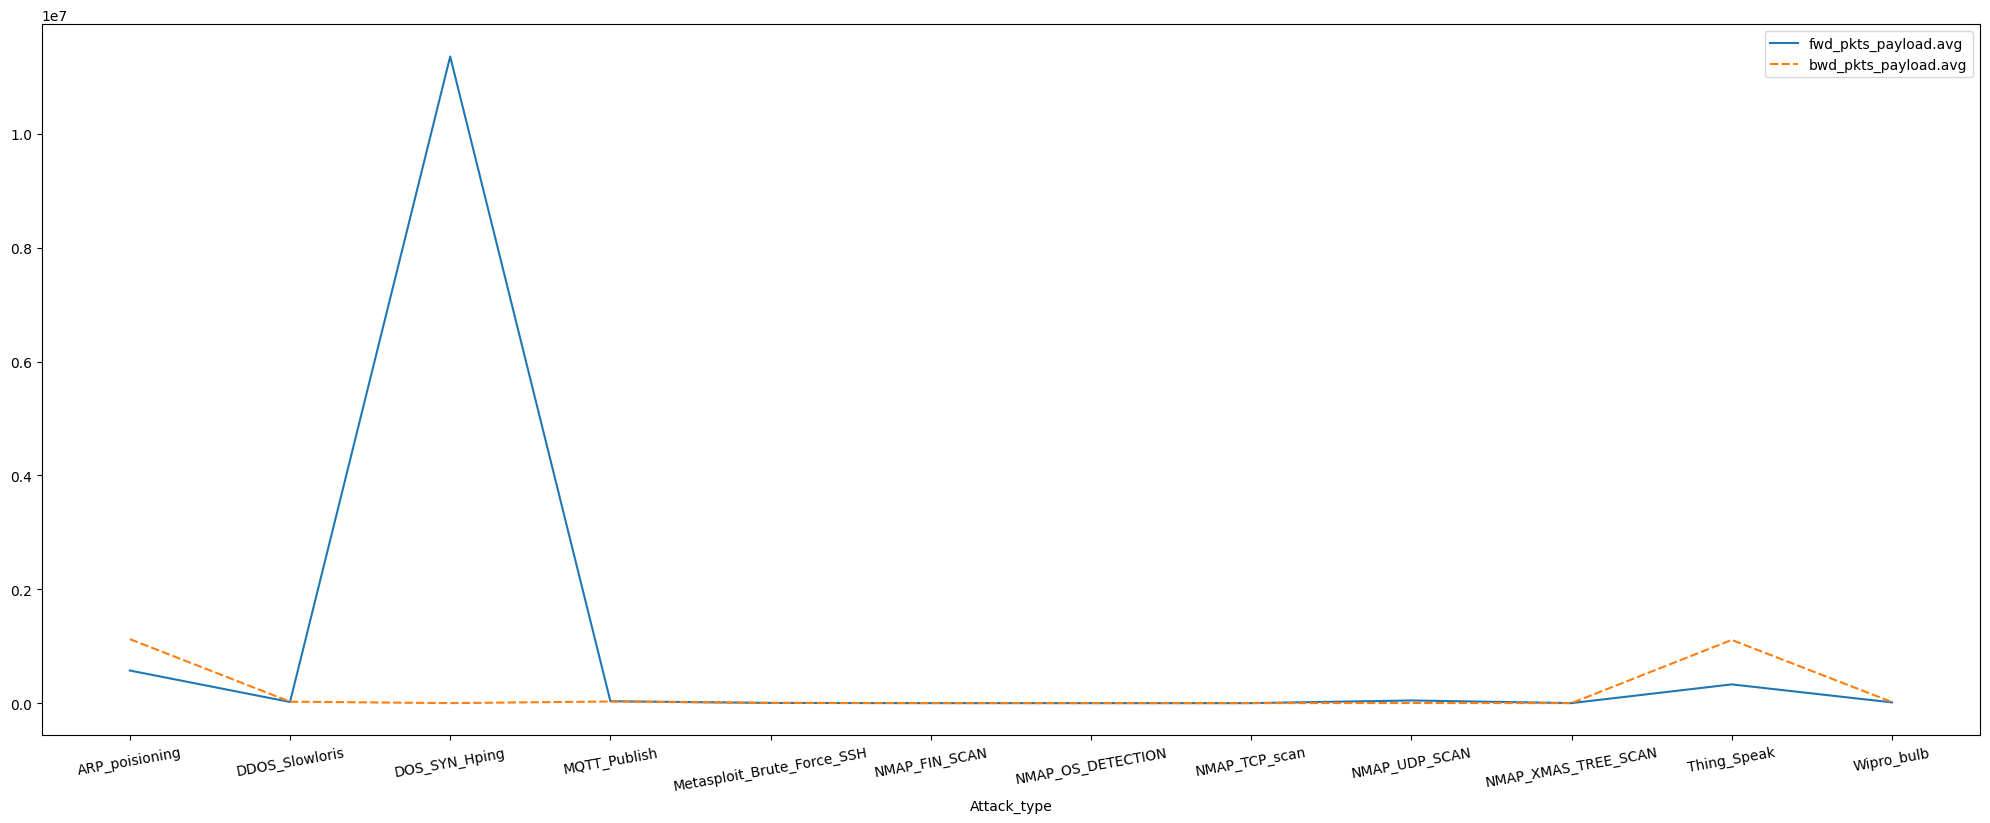

In [ ]:
attack_type_fwd_playload_avg = dataset.groupby('Attack_type')[['fwd_pkts_payload.avg','bwd_pkts_payload.avg']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_playload_avg)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

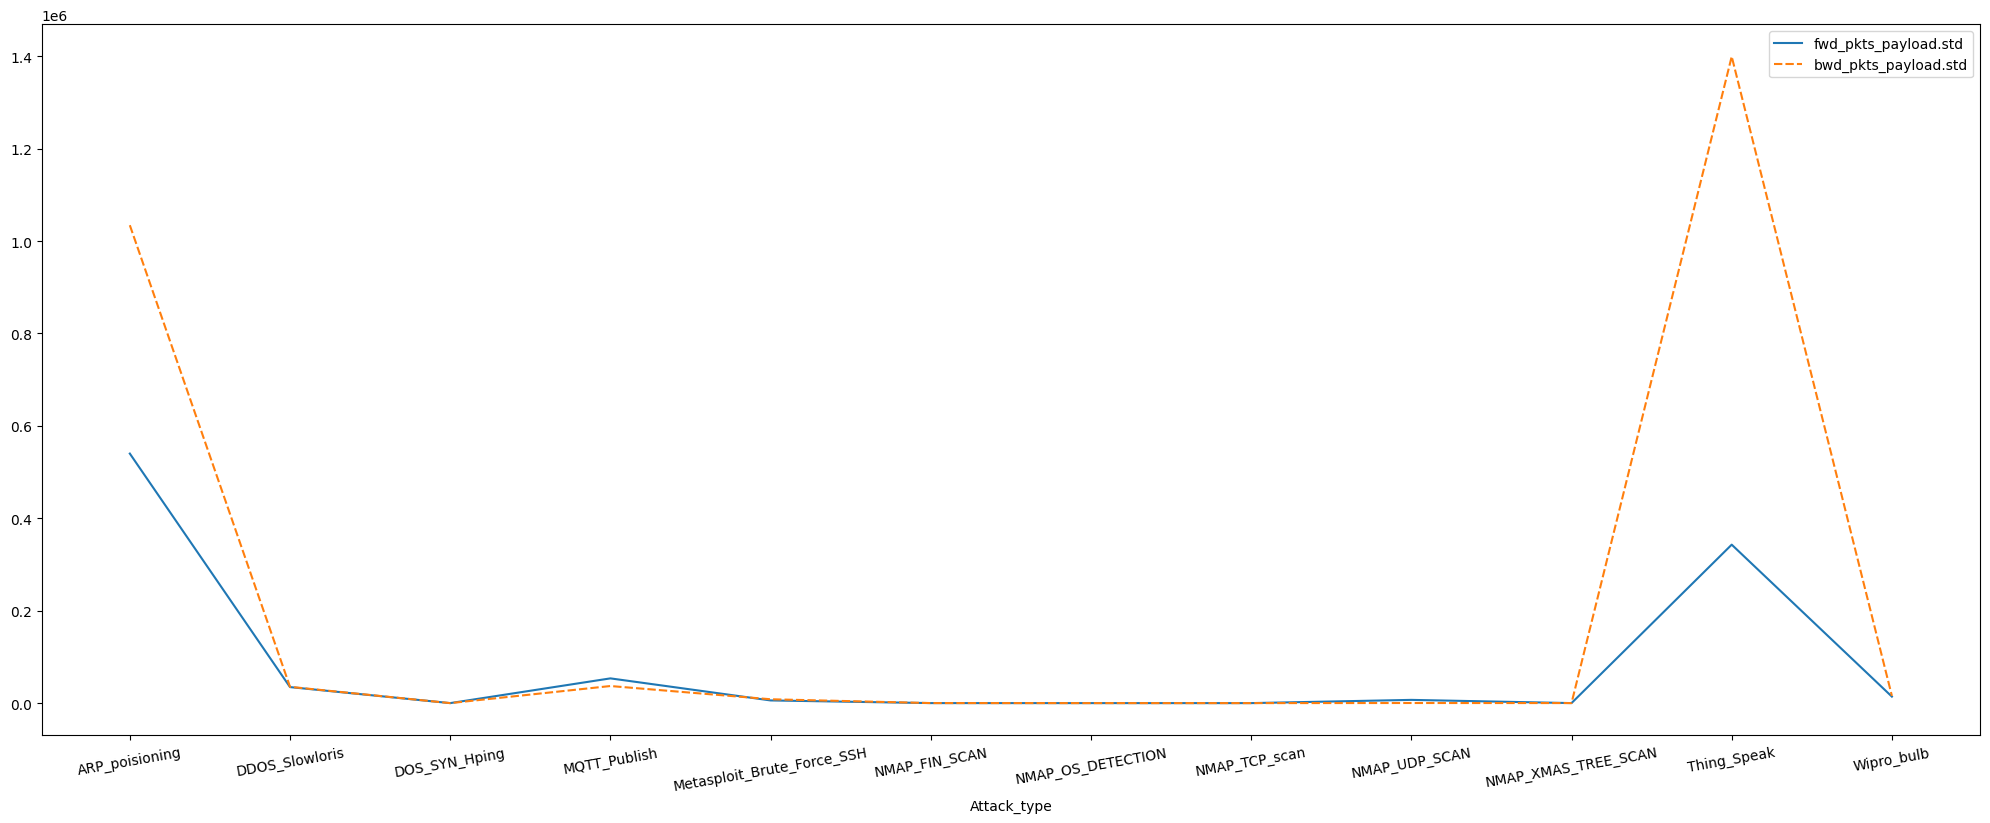

In [ ]:
attack_type_fwd_playload_std = dataset.groupby('Attack_type')[['fwd_pkts_payload.std','bwd_pkts_payload.std']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_playload_std)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

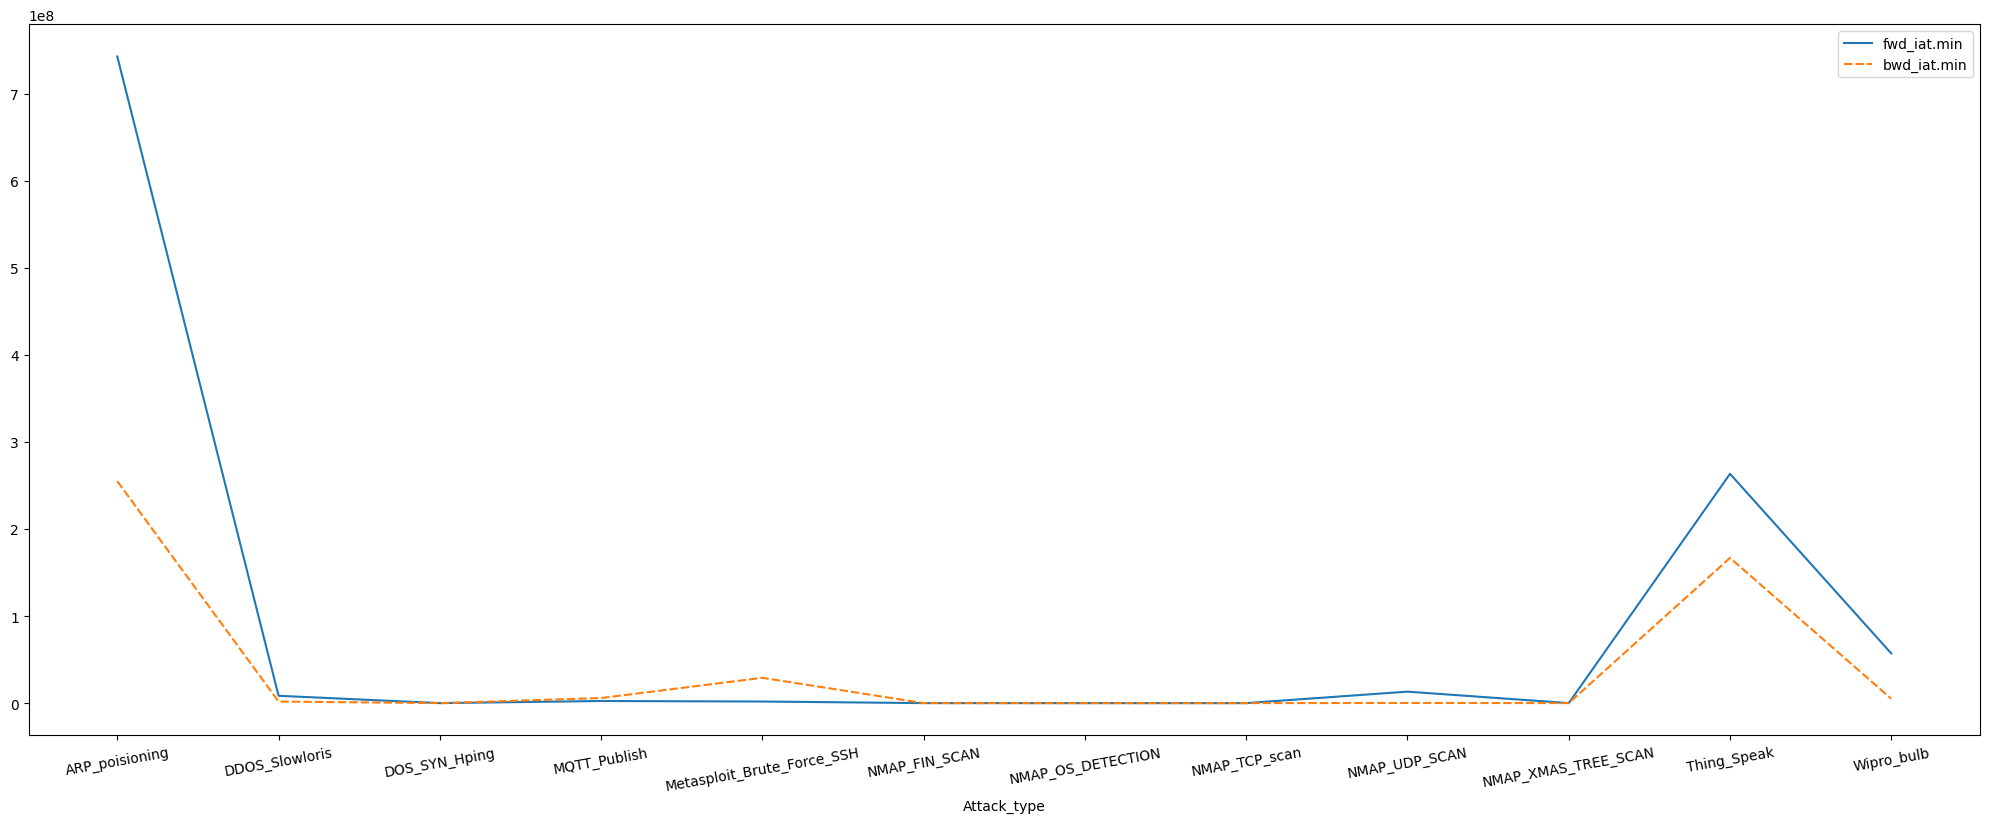

In [ ]:
attack_type_fwd_iat = dataset.groupby('Attack_type')[['fwd_iat.min','bwd_iat.min']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_iat)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

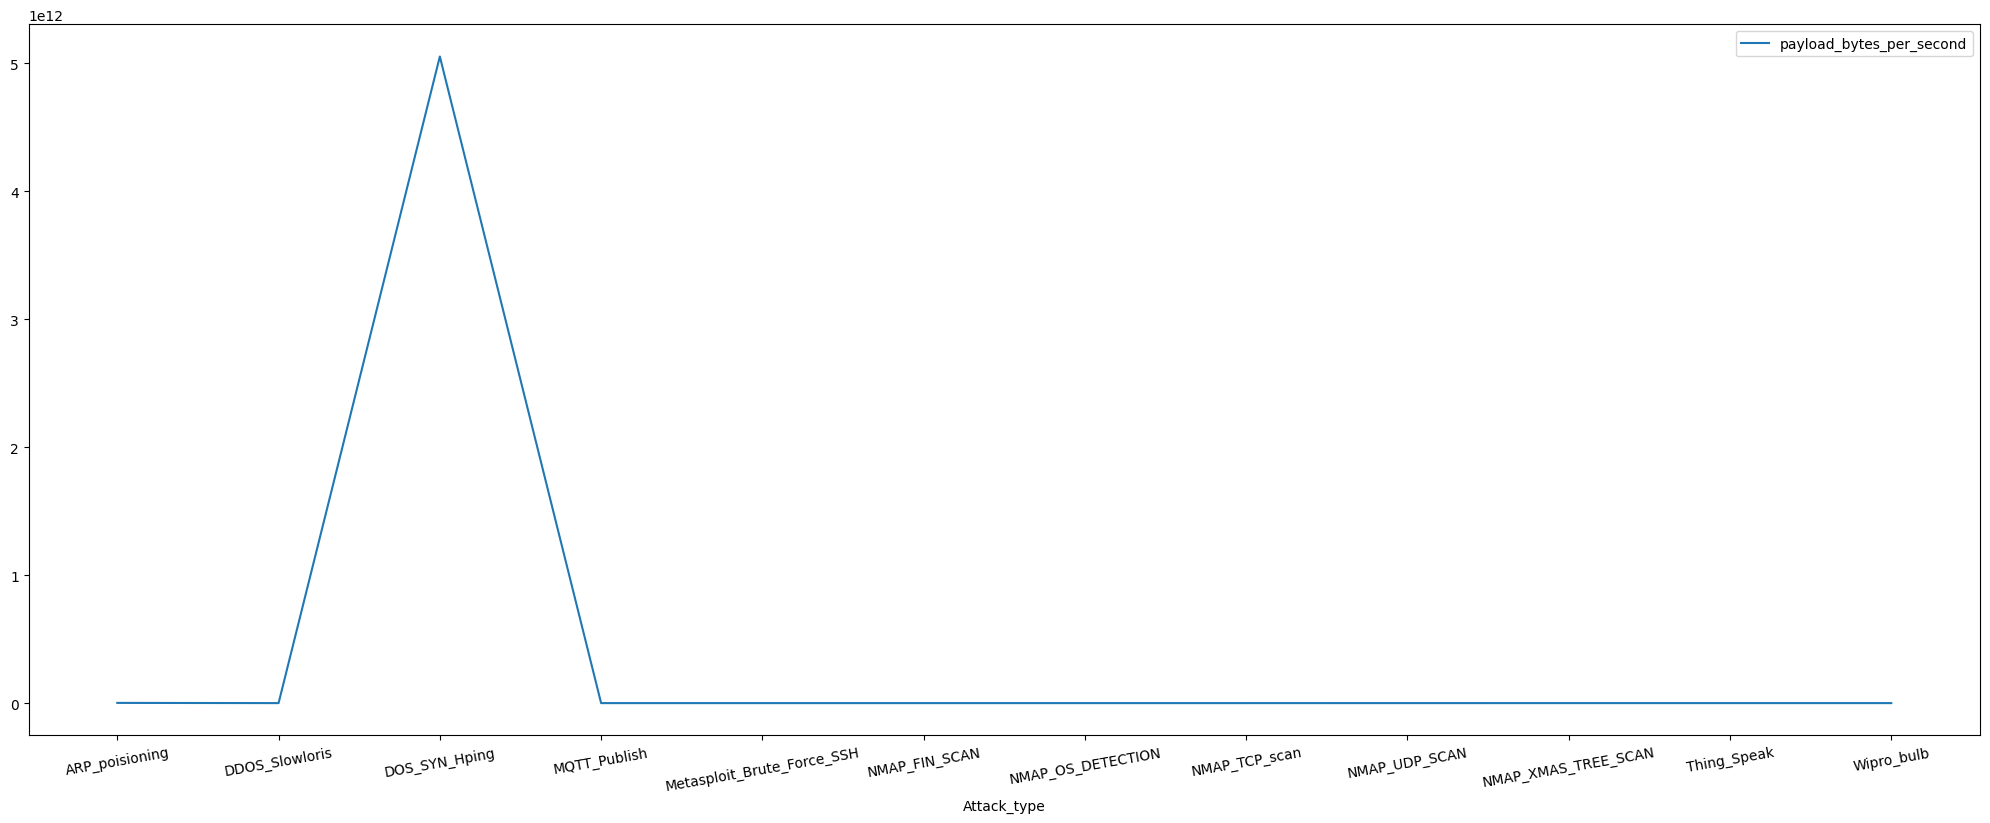

In [ ]:
attack_type_payload_bytes_per_second = dataset.groupby('Attack_type')[['payload_bytes_per_second']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_payload_bytes_per_second)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

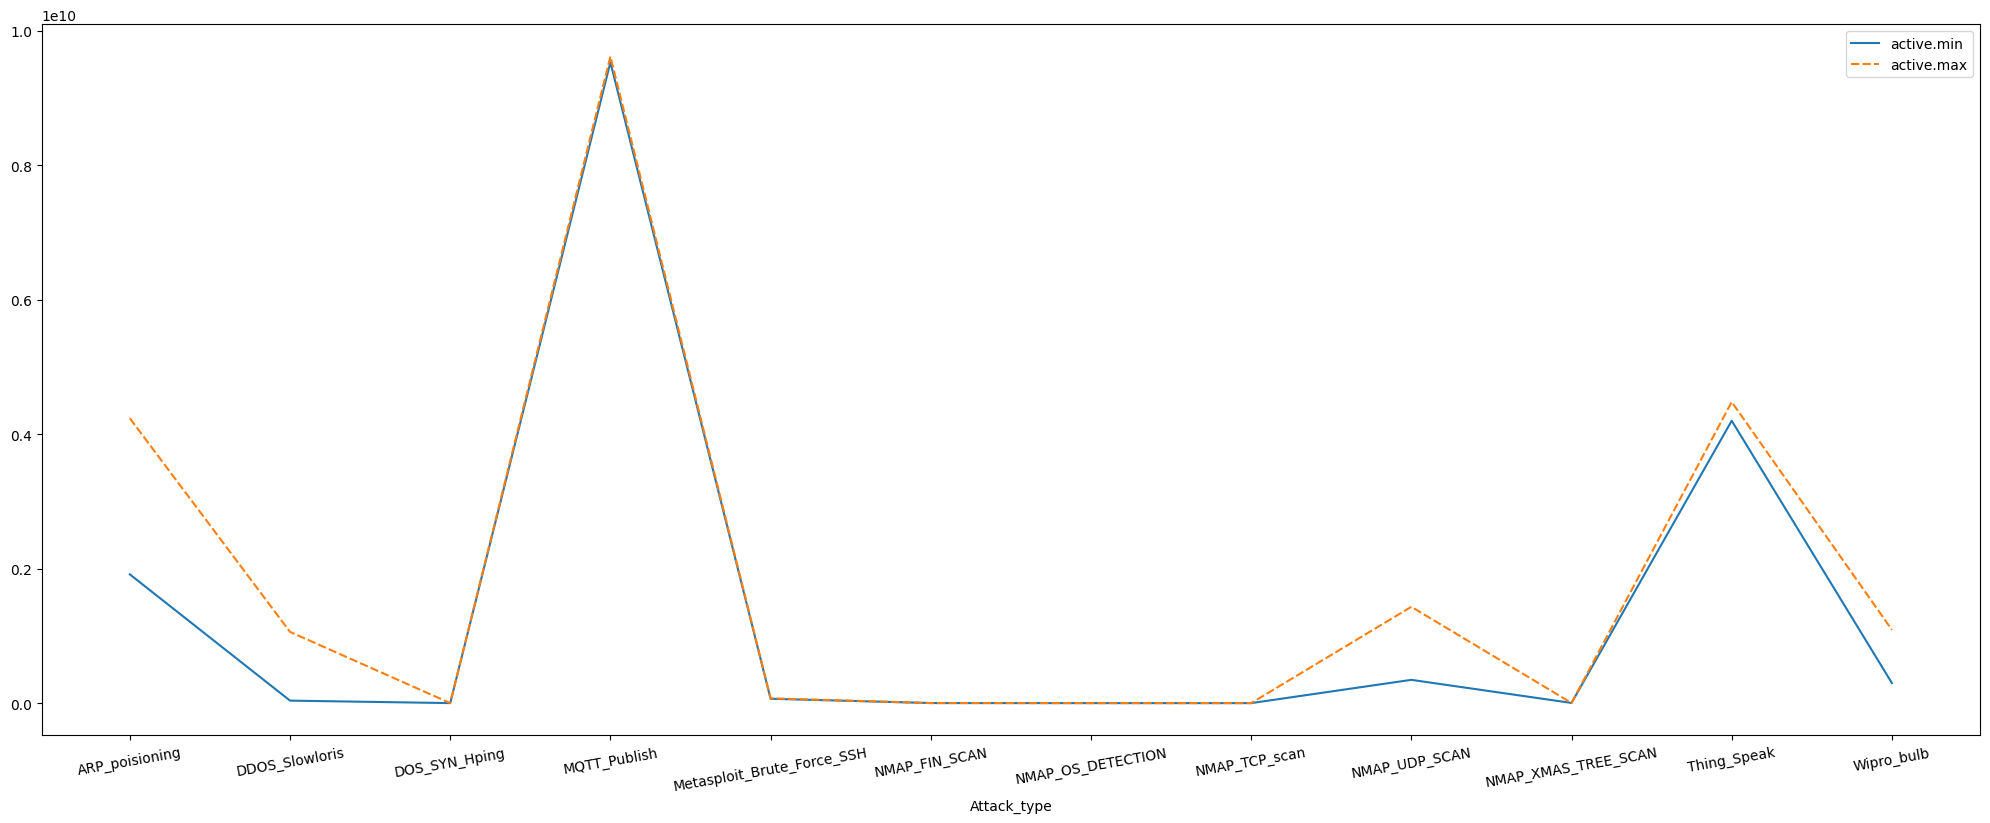

In [ ]:
attack_type_active_min_max = dataset.groupby('Attack_type')[['active.min','active.max']].sum()
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_active_min_max)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

<h1><b>Data Preprocessing

<h3><b>Drom (id.orig_p) and (id.resp_p) Columns

In [9]:
dataset.drop(columns=['id.orig_p','id.resp_p'],inplace=True,axis=1)

<h3><b>Create LabelEncoder and StandardScaler Objects

In [10]:
label = LabelEncoder()
std = StandardScaler()

<h3><b>Spliting Data into X (Features) and Y (Labels)

In [11]:
X = dataset.drop(columns=['Attack_type'])
y = dataset['Attack_type']

<h3><b>Handle missing values

In [12]:
dataset = dataset.fillna(dataset.mean(numeric_only=True))

<h3><b>Transform the required data

In [13]:
X['proto']=X['proto'].astype(str)
X['proto'].dtype

dtype('O')

In [14]:
X['service']=X['service'].astype(str)
X['service'].dtype

dtype('O')

In [15]:
y=[str(val) for val in y]

In [16]:
X['proto'] = label.fit_transform(X['proto'])
X['service'] = label.fit_transform(X['service'])
y = label.fit_transform(y)

<h3><b>Split into Train & Test Data

In [17]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

print(X_train.shape,x_test.shape)

(73870, 81) (49248, 81)


<h3><b>Apply Standarization

In [18]:
X_train = std.fit_transform(X_train)
x_test = std.transform(x_test)

In [19]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

<h1><b>Build the Model Architecture

In [20]:
model = Sequential([
    Dense(2048, activation='relu'),
    Dropout(0.6),
    Dense(1024, activation='relu'),
    Dropout(0.6),
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(13, activation='softmax')
])


<h3><b>Compile the model

In [22]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

<h3><b>Training / Fit the model

In [23]:
history = model.fit(x= X_train, y= Y_train, epochs= 1, validation_split= 0.3, batch_size= 1000)

52/52 [==============================] - 26s 479ms/step - loss: 0.4884 - accuracy: 0.8570 - val_loss: 0.1223 - val_accuracy: 0.9681


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              167936    
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [25]:
loss, acc = model.evaluate(X_train, Y_train)

print(f"Loss = {loss}\nAccuracy = {np.round(acc * 100)}%")

2309/2309 [==============================] - 19s 8ms/step - loss: 0.1252 - accuracy: 0.9677
Loss = 0.12523028254508972
Accuracy = 97.0%


In [26]:
loss, acc = model.evaluate(x_test, y_test)

print(f"Loss = {loss}\nAccuracy = {np.round(acc * 100)}%")

1539/1539 [==============================] - 14s 9ms/step - loss: nan - accuracy: 0.9689
Loss = nan
Accuracy = 97.0%


<h3><b>Model Saving

In [27]:
model.save('Fire_Classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
